# Basic plots 

Stratification, zonal flow, etc. 

The simulation had a glitch, where the sponge was turned off between the years 115 - 135. At the end of this time the sponge was restarted. 

In [35]:
# load modules 

import numpy as np
import xarray as xr
from xmitgcm import open_mdsdataset
from matplotlib import pyplot as plt
from xgcm import Grid
%matplotlib inline

In [2]:
data_dir = '/swot/SUM04/dbalwada/channel_model/05km_sponge/run_tracers_restored/'

model_vars = ['uVeltave','vVeltave','wVeltave', 'Ttave', 
             'UTtave', 'VTtave','WTtave','UUtave', 'UVtave', 'VVtave', 'TTtave', 'ETAtave']
ds_model = open_mdsdataset(data_dir , delta_t=300,  
                          prefix=model_vars,
                          ignore_unknown_vars=True, geometry='cartesian')

/home/dbalwada/.conda/envs/pangeo/lib/python3.6/site-packages/xmitgcm-0.2.2-py3.6.egg/xmitgcm/utils.py:423: UserWarning: Not sure what to do with rlev = L
  warnings.warn("Not sure what to do with rlev = " + rlev)


In [24]:
ds_model.time/24/3600/360

<xarray.DataArray 'time' (time: 109)>
array([115.5, 116. , 116.5, 117. , 117.5, 118. , 118.5, 119. , 119.5, 120. ,
       120.5, 121. , 121.5, 122. , 122.5, 123. , 123.5, 124. , 124.5, 125. ,
       125.5, 126. , 126.5, 127. , 127.5, 128. , 128.5, 129. , 129.5, 130. ,
       130.5, 131. , 131.5, 132. , 132.5, 133. , 133.5, 134. , 134.5, 135. ,
       135.5, 136. , 136.5, 137. , 137.5, 138. , 138.5, 139. , 139.5, 140. ,
       140.5, 141. , 141.5, 142. , 142.5, 143. , 143.5, 144. , 144.5, 145. ,
       145.5, 146. , 146.5, 147. , 147.5, 148. , 148.5, 149. , 149.5, 150. ,
       150.5, 151. , 151.5, 152. , 152.5, 153. , 153.5, 154. , 154.5, 155. ,
       155.5, 156. , 156.5, 157. , 157.5, 158. , 158.5, 159. , 159.5, 160. ,
       160.5, 161. , 161.5, 162. , 162.5, 163. , 163.5, 164. , 164.5, 165. ,
       165.5, 166. , 166.5, 167. , 167.5, 168. , 168.5, 169. , 169.5])
Coordinates:
    iter     (time) int64 dask.array<shape=(109,), chunksize=(1,)>
  * time     (time) int64 3592512000 3608

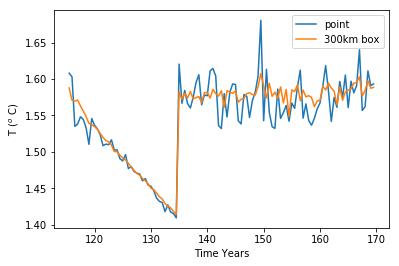

In [9]:
# Temp time series
plt.plot(ds_model.time/24/3600/360, ds_model.Ttave.sel(XC=0, YC=1000e3, Z=-1000, method='nearest'), label='point')
plt.plot(ds_model.time/24/3600/360, ds_model.Ttave.sel(XC=slice(0, 300e3), YC=slice(850e3, 1150e3)
                                                      ).sel(Z=-1000, method='nearest').mean(['XC', 'YC']), label='300km box')
plt.xlabel('Time Years')
plt.ylabel('T ($^o$ C)')
plt.legend()

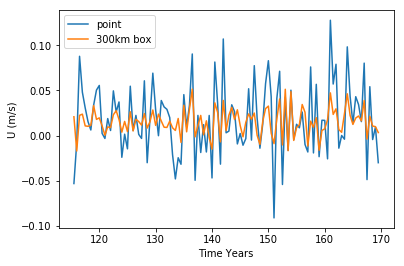

In [12]:
# U time series
plt.plot(ds_model.time/24/3600/360, ds_model.uVeltave.sel(XG=0, YC=1000e3, Z=-1000, method='nearest'), label='point')
plt.plot(ds_model.time/24/3600/360, ds_model.uVeltave.sel(XG=slice(0, 300e3), YC=slice(850e3, 1150e3)
                                                      ).sel(Z=-1000, method='nearest').mean(['XG', 'YC']), label='300km box')
plt.xlabel('Time Years')
plt.ylabel('U (m/s)')
plt.legend()

In [19]:
X = ds_model.XC
Y = ds_model.YC
Z = ds_model.Z

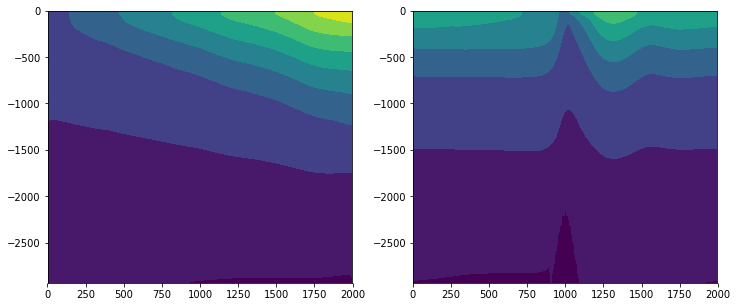

In [27]:
# Stratification/ T sections 

fig, ax = plt.subplots(1,2, figsize=(12,5))

ax[0].contourf(Y/1e3,Z,ds_model.Ttave.sel(XC=0, method='nearest').isel(time=slice(55, 110)).mean('time'),
              levels=np.linspace(0,8,9), extend='both')

ax[1].contourf(X/1e3,Z,ds_model.Ttave.sel(YC=1000e3, method='nearest').isel(time=slice(55, 110)).mean('time'),
              levels=np.linspace(0,8,9), extend='both')

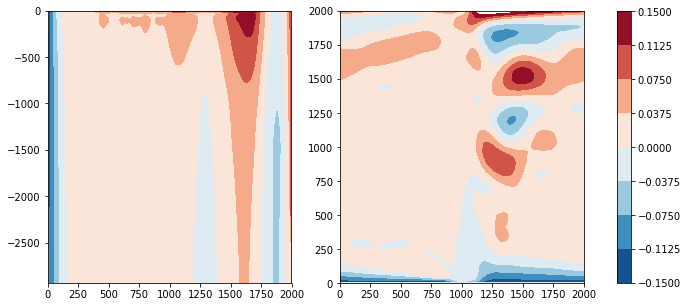

In [39]:
# Velocity

fig, ax = plt.subplots(1,2, figsize=(12,5))

im = ax[0].contourf(Y/1e3,Z,ds_model.uVeltave.sel(XG=0, method='nearest').isel(time=slice(55, 110)).mean('time'), 
               levels=np.linspace(-0.15, 0.15, 9), cmap='RdBu_r')
cbar = fig.colorbar(im, ax=ax)
#cbar.ax.set_ylabel('T ($^oC$)')

ax[1].contourf(X/1e3,Y/1e3,ds_model.uVeltave.sel(Z=-1000, method='nearest').isel(time=slice(55, 110)).mean('time'),
               levels=np.linspace(-0.15, 0.15, 9), cmap='RdBu_r')

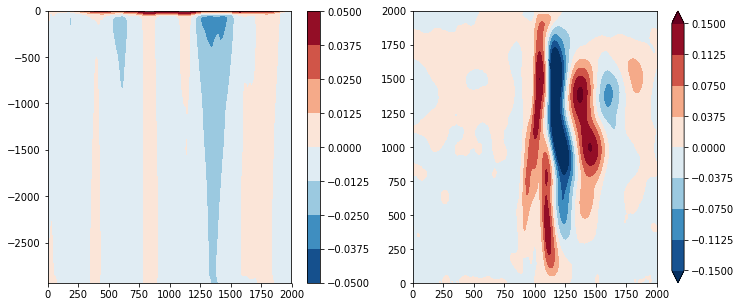

In [40]:
# Velocity

fig, ax = plt.subplots(1,2, figsize=(12,5))

im=ax[0].contourf(Y/1e3,Z,ds_model.vVeltave.sel(XC=0, method='nearest').isel(time=slice(55, 110)).mean('time'), 
               levels=np.linspace(-0.05, 0.05, 9), cmap='RdBu_r')
cbar = fig.colorbar(im, ax=ax[0])
#cbar.ax.set_ylabel('T ($^oC$)')

im = ax[1].contourf(X/1e3,Y/1e3,ds_model.vVeltave.sel(Z=-1000, method='nearest').isel(time=slice(55, 110)).mean('time'),
               levels=np.linspace(-0.15, 0.15, 9), cmap='RdBu_r', extend='both')
cbar = fig.colorbar(im, ax=ax[1])

In [42]:
grid = Grid(ds_model, periodic= 'X')
EKE = 0.5*(grid.interp(ds_model.UUtave, 'X') - grid.interp(ds_model.uVeltave, 'X')**2 + 
           grid.interp(ds_model.VVtave, 'Y', boundary='extend') - grid.interp(ds_model.vVeltave, 'Y', boundary='extend')**2)

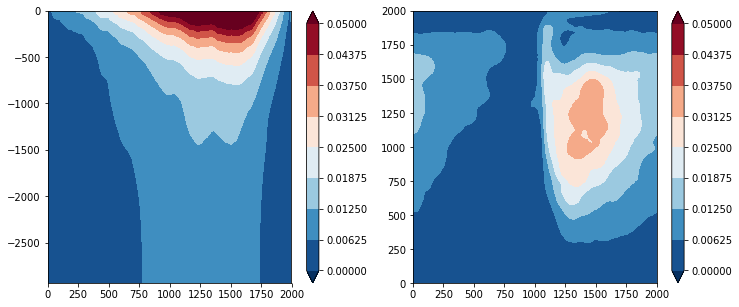

In [47]:
# EKE

fig, ax = plt.subplots(1,2, figsize=(12,5))

im=ax[0].contourf(Y/1e3,Z, EKE.sel(XC=0, method='nearest').isel(time=slice(55, 110)).mean('time'), 
               levels=np.linspace(0, 5e-2, 9), cmap='RdBu_r', extend='both')
cbar = fig.colorbar(im, ax=ax[0])
#cbar.ax.set_ylabel('T ($^oC$)')

im = ax[1].contourf(X/1e3,Y/1e3,EKE.sel(Z=-1000, method='nearest').isel(time=slice(55, 110)).mean('time'),
               levels=np.linspace(0, 5e-2, 9), cmap='RdBu_r', extend='both')
cbar = fig.colorbar(im, ax=ax[1])

# Tracers 

In [48]:
model_vars = ['tracer1_diag', 'tracer2_diag', 'tracer3_diag', 'tracer4_diag', 'tracer5_diag',
              'tracer6_diag', 'tracer7_diag', 'tracer8_diag', 'tracer9_diag', 'tracer10_diag',
              'tracer11_diag', 'tracer12_diag', 'tracer13_diag', 'tracer14_diag', 'tracer15_diag',
              'tracer16_diag', 'tracer17_diag', 'tracer18_diag', 'tracer19_diag', 'tracer20_diag',]
ds_tracers = open_mdsdataset(data_dir , delta_t=300,  
                          prefix=model_vars,
                          ignore_unknown_vars=True, geometry='cartesian')

/home/dbalwada/.conda/envs/pangeo/lib/python3.6/site-packages/xmitgcm-0.2.2-py3.6.egg/xmitgcm/utils.py:423: UserWarning: Not sure what to do with rlev = L
  warnings.warn("Not sure what to do with rlev = " + rlev)


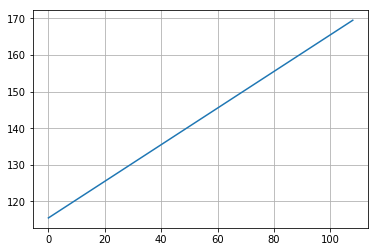

In [57]:
plt.plot(ds_tracers.time/24/3600/360)
plt.grid()

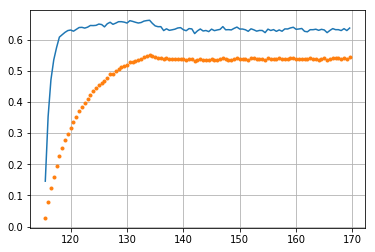

In [50]:
plt.plot(ds_tracers.time/24/3600/360, ds_tracers.TRAC01.sel(XC=slice(0, 400e3), YC=slice(800e3,1200e33)).mean(['XC', 'YC']).sel(Z=-1000, method='nearest'))
plt.plot(ds_tracers.time/24/3600/360, ds_tracers.TRAC02.sel(XC=slice(0, 400e3), YC=slice(800e3,1200e33)).mean(['XC', 'YC']).sel(Z=-1000, method='nearest'),'.')
plt.grid()

In [83]:
Lx = 2000e3
C1 = Z/Z*Y/Lx*X/X
C3 =  Z/Z*Y/Y*np.cos(2 *np.pi *X/Lx)

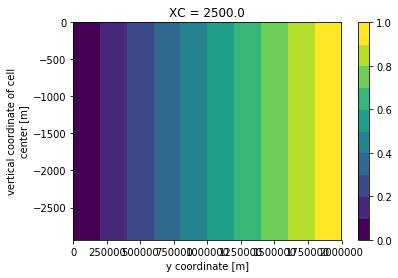

In [87]:
C1.sel(XC=0, method='nearest').plot.contourf(levels=np.linspace(0,1,11))

/home/dbalwada/.conda/envs/pangeo/lib/python3.6/site-packages/matplotlib/contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


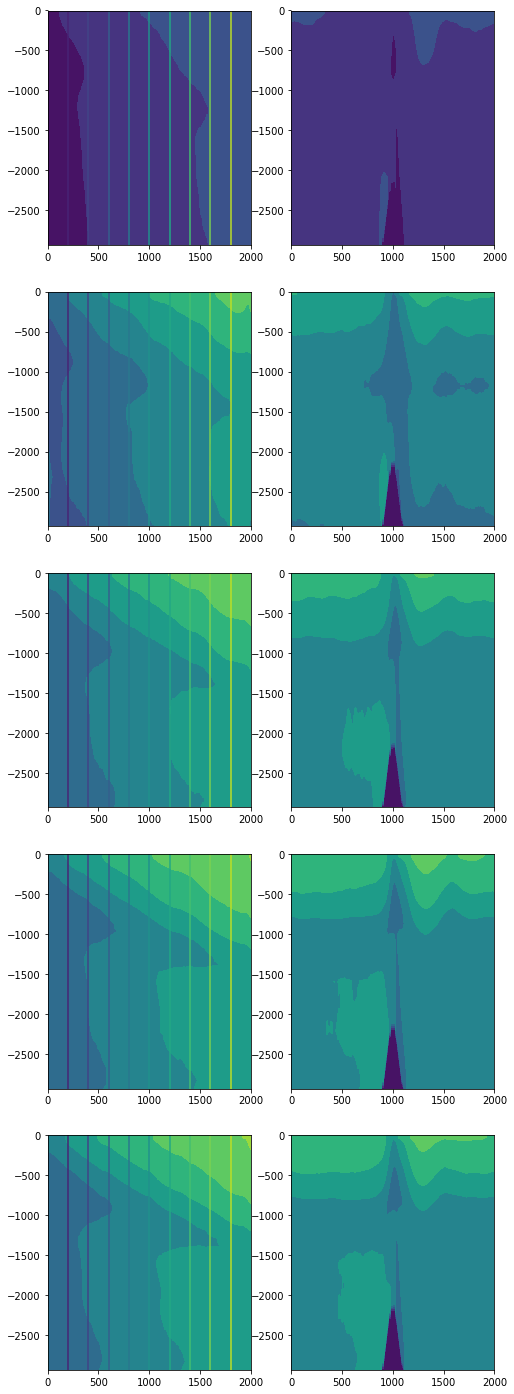

In [90]:
fig, ax = plt.subplots(5,2,figsize=(8,25))

ax[0,0].contourf(Y/1e3,Z, ds_tracers.TRAC02.sel(XC=0, method='nearest'
                                               ).isel(time=slice(0,10)).mean('time'), 
                levels=np.linspace(0,1,11))
ax[0,0].contour(Y/1e3,Z, C1.sel(XC=0, method='nearest'),levels=np.linspace(0,1,11))

ax[0,1].contourf(X/1e3,Z, ds_tracers.TRAC02.sel(YC=1000e3, method='nearest'
                                               ).isel(time=slice(0,10)).mean('time'), 
                levels=np.linspace(0,1,11))
ax[0,1].contour(Y/1e3,Z, C1.sel(YC=1000e3, method='nearest'),levels=np.linspace(0,1,11))


ax[1,0].contourf(Y/1e3,Z, ds_tracers.TRAC02.sel(XC=0, method='nearest'
                                               ).isel(time=slice(20,30)).mean('time'), 
                levels=np.linspace(0,1,11))
ax[1,0].contour(Y/1e3,Z, C1.sel(XC=0, method='nearest'),levels=np.linspace(0,1,11))


ax[1,1].contourf(X/1e3,Z, ds_tracers.TRAC02.sel(YC=1000e3, method='nearest'
                                               ).isel(time=slice(20,30)).mean('time'), 
                levels=np.linspace(0,1,11))
ax[1,1].contour(Y/1e3,Z, C1.sel(YC=1000e3, method='nearest'),levels=np.linspace(0,1,11))


ax[2,0].contourf(Y/1e3,Z, ds_tracers.TRAC02.sel(XC=0, method='nearest'
                                               ).isel(time=slice(40,50)).mean('time'), 
                levels=np.linspace(0,1,11))
ax[2,0].contour(Y/1e3,Z, C1.sel(XC=0, method='nearest'),levels=np.linspace(0,1,11))


ax[2,1].contourf(X/1e3,Z, ds_tracers.TRAC02.sel(YC=1000e3, method='nearest'
                                               ).isel(time=slice(40,50)).mean('time'), 
                levels=np.linspace(0,1,11))
ax[2,1].contour(Y/1e3,Z, C1.sel(YC=1000e3, method='nearest'),levels=np.linspace(0,1,11))


ax[3,0].contourf(Y/1e3,Z, ds_tracers.TRAC02.sel(XC=0, method='nearest'
                                               ).isel(time=slice(60,70)).mean('time'), 
                levels=np.linspace(0,1,11))
ax[3,0].contour(Y/1e3,Z, C1.sel(XC=0, method='nearest'),levels=np.linspace(0,1,11))

ax[3,1].contourf(X/1e3,Z, ds_tracers.TRAC02.sel(YC=1000e3, method='nearest'
                                               ).isel(time=slice(60,70)).mean('time'), 
                levels=np.linspace(0,1,11))
ax[3,1].contour(Y/1e3,Z, C1.sel(YC=1000e3, method='nearest'),levels=np.linspace(0,1,11))

ax[4,0].contourf(Y/1e3,Z, ds_tracers.TRAC02.sel(XC=0, method='nearest'
                                               ).isel(time=slice(80,90)).mean('time'), 
                levels=np.linspace(0,1,11))
ax[4,0].contour(Y/1e3,Z, C1.sel(XC=0, method='nearest'),levels=np.linspace(0,1,11))

ax[4,1].contourf(X/1e3,Z, ds_tracers.TRAC02.sel(YC=1000e3, method='nearest'
                                               ).isel(time=slice(80,90)).mean('time'), 
                levels=np.linspace(0,1,11))
ax[4,1].contour(Y/1e3,Z, C1.sel(YC=1000e3, method='nearest'),levels=np.linspace(0,1,11))


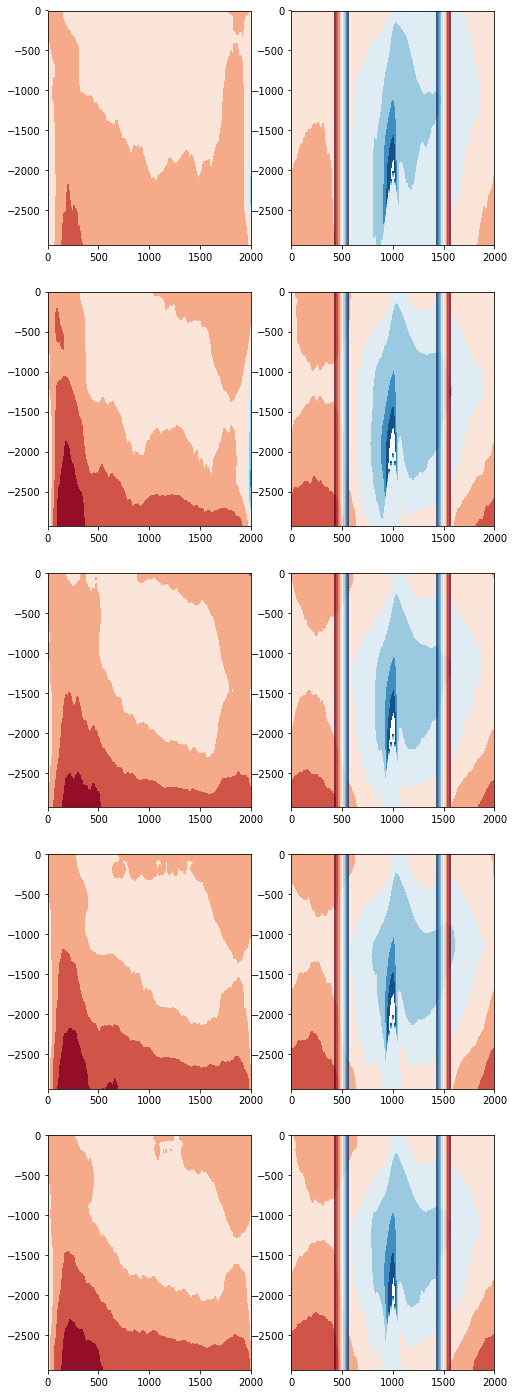

In [92]:
fig, ax = plt.subplots(5,2,figsize=(8,25))

ax[0,0].contourf(Y/1e3,Z, ds_tracers.TRAC06.sel(XC=0, method='nearest'
                                               ).isel(time=slice(0,10)).mean('time'), 
                levels=np.linspace(-0.2,0.2,9), cmap='RdBu_r')
ax[0,0].contour(Y/1e3,Z, C3.sel(XC=0, method='nearest'),levels=np.linspace(-0.2,0.2,9), cmap='RdBu_r')

ax[0,1].contourf(X/1e3,Z, ds_tracers.TRAC06.sel(YC=1000e3, method='nearest'
                                               ).isel(time=slice(0,10)).mean('time'), 
                levels=np.linspace(-0.2,0.2,9), cmap='RdBu_r')
ax[0,1].contour(Y/1e3,Z, C3.sel(YC=1000e3, method='nearest'),levels=np.linspace(-0.2,0.2,9), cmap='RdBu_r')


ax[1,0].contourf(Y/1e3,Z, ds_tracers.TRAC06.sel(XC=0, method='nearest'
                                               ).isel(time=slice(20,30)).mean('time'), 
                levels=np.linspace(-0.2,0.2,9), cmap='RdBu_r')
ax[1,0].contour(Y/1e3,Z, C3.sel(XC=0, method='nearest'),levels=np.linspace(-0.2,0.2,9), cmap='RdBu_r')


ax[1,1].contourf(X/1e3,Z, ds_tracers.TRAC06.sel(YC=1000e3, method='nearest'
                                               ).isel(time=slice(20,30)).mean('time'), 
                levels=np.linspace(-0.2,0.2,9), cmap='RdBu_r')
ax[1,1].contour(Y/1e3,Z, C3.sel(YC=1000e3, method='nearest'),levels=np.linspace(-0.2,0.2,9), cmap='RdBu_r')


ax[2,0].contourf(Y/1e3,Z, ds_tracers.TRAC06.sel(XC=0, method='nearest'
                                               ).isel(time=slice(40,50)).mean('time'), 
                levels=np.linspace(-0.2,0.2,9), cmap='RdBu_r')
ax[2,0].contour(Y/1e3,Z, C3.sel(XC=0, method='nearest'),levels=np.linspace(-0.2,0.2,9), cmap='RdBu_r')


ax[2,1].contourf(X/1e3,Z, ds_tracers.TRAC06.sel(YC=1000e3, method='nearest'
                                               ).isel(time=slice(40,50)).mean('time'), 
                levels=np.linspace(-0.2,0.2,9), cmap='RdBu_r')
ax[2,1].contour(Y/1e3,Z, C3.sel(YC=1000e3, method='nearest'),levels=np.linspace(-0.2,0.2,9), cmap='RdBu_r')


ax[3,0].contourf(Y/1e3,Z, ds_tracers.TRAC06.sel(XC=0, method='nearest'
                                               ).isel(time=slice(60,70)).mean('time'), 
                levels=np.linspace(-0.2,0.2,9), cmap='RdBu_r')
ax[3,0].contour(Y/1e3,Z, C3.sel(XC=0, method='nearest'),levels=np.linspace(-0.2,0.2,9), cmap='RdBu_r')

ax[3,1].contourf(X/1e3,Z, ds_tracers.TRAC06.sel(YC=1000e3, method='nearest'
                                               ).isel(time=slice(60,70)).mean('time'), 
                levels=np.linspace(-0.2,0.2,9), cmap='RdBu_r')
ax[3,1].contour(Y/1e3,Z, C3.sel(YC=1000e3, method='nearest'),levels=np.linspace(-0.2,0.2,9), cmap='RdBu_r')

ax[4,0].contourf(Y/1e3,Z, ds_tracers.TRAC06.sel(XC=0, method='nearest'
                                               ).isel(time=slice(80,90)).mean('time'), 
                levels=np.linspace(-0.2,0.2,9), cmap='RdBu_r')
ax[4,0].contour(Y/1e3,Z, C3.sel(XC=0, method='nearest'),levels=np.linspace(-0.2,0.2,9), cmap='RdBu_r')

ax[4,1].contourf(X/1e3,Z, ds_tracers.TRAC06.sel(YC=1000e3, method='nearest'
                                               ).isel(time=slice(80,90)).mean('time'), 
                levels=np.linspace(-0.2,0.2,9), cmap='RdBu_r')
ax[4,1].contour(Y/1e3,Z, C3.sel(YC=1000e3, method='nearest'),levels=np.linspace(-0.2,0.2,9), cmap='RdBu_r')


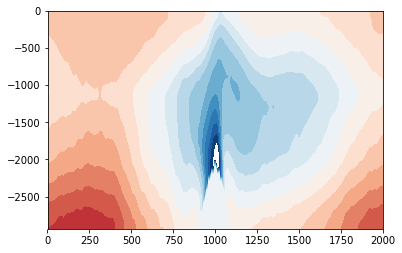

In [93]:
plt.contourf(X/1e3,Z, ds_tracers.TRAC06.sel(YC=1000e3, method='nearest'
                                               ).isel(time=slice(80,90)).mean('time'), 
                levels=np.linspace(-0.2,0.2,19), cmap='RdBu_r')

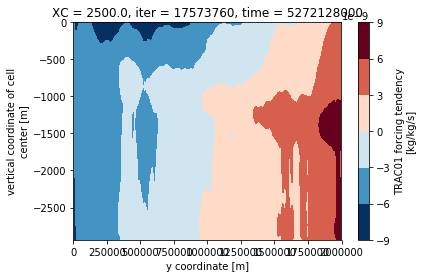

In [100]:
ds_tracers.ForcTr01.sel(XC=0, method='nearest').isel(time=-1).plot.contourf()

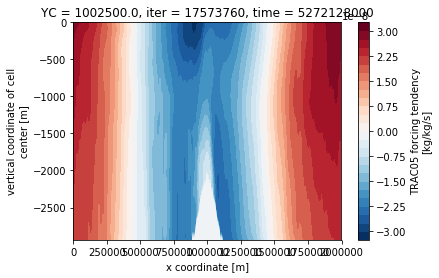

In [101]:
ds_tracers.ForcTr05.sel(YC=1000e3, method='nearest').isel(time=-1).plot.contourf(levels=30)